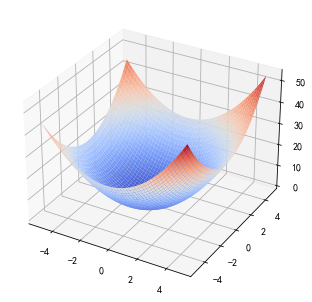

最优值是：-0.23584
最优解是：x=-0.45195,y=-0.10886


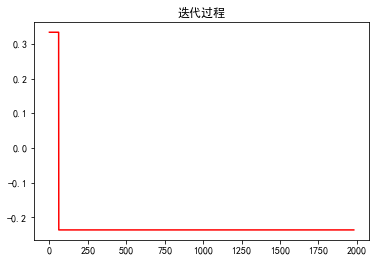

In [6]:
#f(x,y) = x^2 + y^2 + x
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D#导入该函数是为了绘制3D图
import matplotlib as mpl
 
 
#########
#将数据绘图出来
#生成X和Y的数据
X = np.arange(-5,5,0.1) #-5到5的等距数组，距离为0.1，注意区分开range(),它返回的是一个列表
Y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(X,Y)#该函数用来生成网格点坐标矩阵。
 
#目标函数
Z = X**2 + Y**2 + X
 
#绘图
fig = plt.figure()#创立一个画布
ax = Axes3D(fig)#在这个画布里，生成一个三维的空间
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)#该函数是为了将数据在这三维空间里可视化出来。
plt.show()
###########
 
#######
#计算适应度，这里的适应度就是我们目标函数Z的值，因为我们要求Z的最小值。
#这两个函数，一般使用mpl画图的时候都会用到
mpl.rcParams['font.sans-serif'] = ['SimHei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'无法显示的问题
#使用matplotliblib画图的时候经常会遇见中文或者是负号无法显示的情况
#rcParams函数里的参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等
 
def fitness_func(X):
    x = X[:,0]
    y = X[:,1]
    return x**2 + y**2 + x
##########
 
#############
#更新速度，根据公式V(t+1)=w*V(t)+c1*r1*(pbest_i-xi)+c1*r1*(gbest_xi)
def velocity_update(V,X,pbest,gbest,c1,c2,w,max_val):
    size = X.shape[0]#返回矩阵X的行数
    r1 = np.random.random((size,1))#该函数表示成size行 1列的浮点数，浮点数都是从0-1中随机。
    r2 = np.random.random((size,1))
    V = w*V + c1*r1*(pbest-X)+c2*r2*(gbest-X)#注意这里得到的是一个矩阵
    
    #这里是一个防止速度过大的处理，怕错过最理想值
    V[V<-max_val] = -max_val
    V[V>-max_val] = max_val
    return V
#########
 
 
########
#更新粒子位置，根据公式X(t+1)=X(t)+V
def position_updata(X,V):
    return X+V
##########
 
 
#########
def pos():
    w = 1 #设置惯性权重
    c1 = 2 #设置个体学习系数
    c2 = 2 #设置全局学习系数
    r1 = None
    r2 = None
    dim = 2
    size = 20 #这里是初始化粒子群，20个
    iter_num = 100 #迭代1000次
    max_val = 0.5 #限定最大速度为0.5
    best_fitness = float(9e10) #初始化适应度的值
    fitness_val_list = []
    
    #初始化各个粒子的位置
    X = np.random.uniform(-5,5,size=(size,dim))
    #初始化各个粒子的速度
    V = np.random.uniform(-0.5,0.5,size=(size,dim))
    
    p_fitness = fitness_func(X)#得到各个个体的适应度值
    g_fitness = p_fitness.min()#全局最理想的适应度值
    fitness_val_list.append(g_fitness)
    
    pbest = X#初始化个体的最优位置
    gbest = X[p_fitness.argmin()]#初始化整个整体的最优位置
    
    #迭代
    for i in range(1,iter_num):
        V = velocity_update(V, X, pbest, gbest, c1, c2, w, max_val)
        X = position_updata(X,V)
        p_fitness2 = fitness_func(X)
        g_fitness2 = p_fitness2.min()
        
        #更新每个粒子的历史的最优位置
        for j in range(size):
            if p_fitness[j] > p_fitness2[j]:
                pbest[j] = X[j]
                p_fitness[j] = p_fitness2[j]
            if g_fitness > g_fitness2:
                gbest = X[p_fitness2.argmin()]
                g_fitness = g_fitness2
                
            fitness_val_list.append(g_fitness)
            
            i += 1
            
    print("最优值是：%.5f" % fitness_val_list[-1])
    print("最优解是：x=%.5f,y=%.5f" % (gbest[0],gbest[1]))
    
    
    plt.plot(fitness_val_list,c='r')
    plt.title('迭代过程')
    plt.show()
#########
 
    
if __name__ == '__main__':
    pos()